<a href="https://colab.research.google.com/github/Samarth-Sharma-G/258_Final_Project/blob/main/258InitialTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.4 MB/s eta 0:00:00


In [ ]:
#connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import mlflow

In [ ]:
mlflow.set_tracking_uri('/content/drive/MyDrive/MLFlowLogs')

In [ ]:
experiment_name = 'binary_classification_waffer'

In [ ]:
mlflow.set_experiment(experiment_name)

2024/05/19 03:58:59 INFO mlflow.tracking.fluent: Experiment with name 'binary_classification_waffer' does not exist. Creating a new experiment.


<Experiment: artifact_location='/content/drive/MyDrive/MLFlowLogs/797476472396622367', creation_time=1716091139881, experiment_id='797476472396622367', last_update_time=1716091139881, lifecycle_stage='active', name='binary_classification_waffer', tags={}>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
X = pd.read_pickle('/content/drive/MyDrive/images_extracted.pkl')
Y = pd.read_pickle('/content/drive/MyDrive/images_labels.pkl')


In [ ]:
X.shape, Y.shape

((1777, 26, 26, 1), (1777,))

In [ ]:
#create a train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#first model
def model1():
      model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(26, 26, 1)),
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
      ])

      model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
      return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from mlflow.models.signature import infer_signature

In [ ]:
def train(model, X_train, Y_train, X_test, Y_test,model_name):
  with mlflow.start_run(run_name = model_name):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    mlflow.log_metric('loss', score[0])
    mlflow.log_metric('accuracy', score[1])
    # Log the model
    input_example = X_train[:1]
    signature = infer_signature(input_example, model.predict(input_example))
    mlflow.tensorflow.log_model(model, model_name, signature=signature)
    # Enable autologging
    mlflow.tensorflow.autolog()
  return history,model

In [ ]:
history_1,model_1=train(model1(), X_train, Y_train, X_test, Y_test,'model1')

Epoch 1/10
 6/45 [===>..........................] - ETA: 0s - loss: 0.9468 - accuracy: 0.5521

44/45 [============================>.] - ETA: 0s - loss: 0.7275 - accuracy: 0.5341

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 9s 159ms/step - loss: 0.7271 - accuracy: 0.5341 - val_loss: 0.6877 - val_accuracy: 0.6348
Epoch 2/10
45/45 [==============================] - 10s 233ms/step - loss: 0.6896 - accuracy: 0.5243 - val_loss: 0.6819 - val_accuracy: 0.7079
Epoch 3/10
45/45 [==============================] - 7s 161ms/step - loss: 0.6278 - accuracy: 0.6735 - val_loss: 0.5504 - val_accuracy: 0.7135
Epoch 4/10
45/45 [==============================] - 14s 309ms/step - loss: 0.4665 - accuracy: 0.7811 - val_loss: 0.5500 - val_accuracy: 0.7135
Epoch 5/10
45/45 [==============================] - 1s 22ms/step - loss: 0.2847 - accuracy: 0.8874 - val_loss: 0.8126 - val_accuracy: 0.6152
Epoch 6/10
45/45 [==============================] - 9s 194ms/step - loss: 0.1210 - accuracy: 0.9627 - val_loss: 0.7244 - val_accuracy: 0.7360
Epoch 7/10
45/45 [==============================] - 1s 22ms/step - loss: 0.0219 - accuracy: 0.9958 - val_loss: 0.8865 - val_accuracy: 0.7584
Epoch 8/10
45/45 

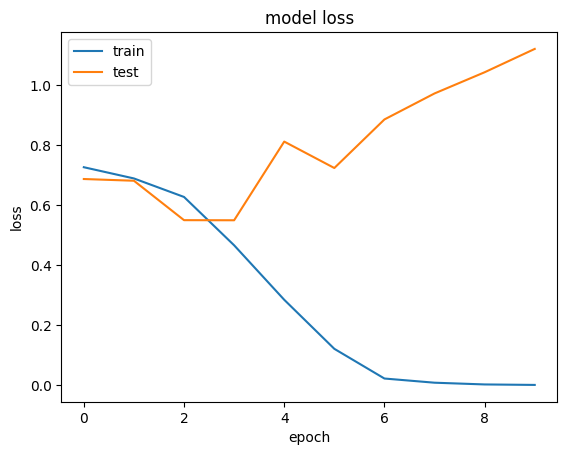

In [ ]:
#visualize the loss and accuracy over epochs
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We might have to include some sort of regularization and early stopping. At the same time the above architecture doesn't follow the standar architetcure of Conv Layer followed by pooling layer

In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(26, 26, 1)),
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
      ])

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_1,model_1=train(model, X_train, Y_train, X_test, Y_test,'model1_with_max_pool')

Epoch 1/10
 1/45 [..............................] - ETA: 3:02 - loss: 0.6960 - accuracy: 0.3750

45/45 [==============================] - 7s 57ms/step - loss: 0.6993 - accuracy: 0.4961 - val_loss: 0.6933 - val_accuracy: 0.4888
Epoch 2/10
11/45 [======>.......................] - ETA: 0s - loss: 0.6929 - accuracy: 0.5227

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5194 - val_loss: 0.6895 - val_accuracy: 0.5112
Epoch 3/10
45/45 [==============================] - 0s 11ms/step - loss: 0.6916 - accuracy: 0.5102 - val_loss: 0.6892 - val_accuracy: 0.7135
Epoch 4/10
45/45 [==============================] - 0s 10ms/step - loss: 0.6848 - accuracy: 0.5651 - val_loss: 0.6660 - val_accuracy: 0.5112
Epoch 5/10
45/45 [==============================] - 0s 7ms/step - loss: 0.6728 - accuracy: 0.5947 - val_loss: 0.6988 - val_accuracy: 0.4888
Epoch 6/10
45/45 [==============================] - 0s 11ms/step - loss: 0.6957 - accuracy: 0.5011 - val_loss: 0.6944 - val_accuracy: 0.4888
Epoch 7/10
45/45 [==============================] - 0s 10ms/step - loss: 0.6873 - accuracy: 0.5426 - val_loss: 0.6675 - val_accuracy: 0.5983
Epoch 8/10
45/45 [==============================] - 0s 8ms/step - loss: 0.6582 - accuracy: 0.6038 - val_loss: 0.6714 - val_accuracy: 0.5534
Epoch 9/10
45/45 [========

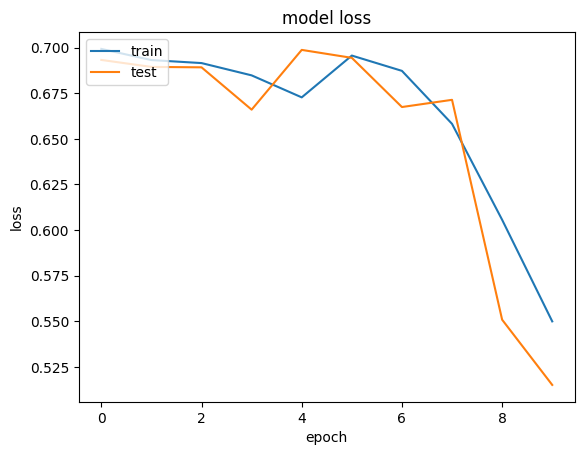

In [ ]:
#visualize the loss and accuracy over epochs
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We are getting somewher

In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(26, 26, 1)),
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
      ])

model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_2,model_2=train(model, X_train, Y_train, X_test, Y_test,'model1_with_max_pool_adadelta')

Epoch 1/10
 1/45 [..............................] - ETA: 1:58 - loss: 0.7119 - accuracy: 0.4688

45/45 [==============================] - 3s 15ms/step - loss: 0.6952 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
10/45 [=====>........................] - ETA: 0s - loss: 0.6905 - accuracy: 0.5312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 0s 10ms/step - loss: 0.6918 - accuracy: 0.5208 - val_loss: 0.6925 - val_accuracy: 0.5225
Epoch 3/10
45/45 [==============================] - 0s 7ms/step - loss: 0.6940 - accuracy: 0.5158 - val_loss: 0.6944 - val_accuracy: 0.4944
Epoch 4/10
45/45 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.4933 - val_loss: 0.6948 - val_accuracy: 0.4888
Epoch 5/10
45/45 [==============================] - 0s 11ms/step - loss: 0.6906 - accuracy: 0.5222 - val_loss: 0.6938 - val_accuracy: 0.4916
Epoch 6/10
45/45 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5067 - val_loss: 0.6933 - val_accuracy: 0.4944
Epoch 7/10
45/45 [==============================] - 1s 11ms/step - loss: 0.6928 - accuracy: 0.5137 - val_loss: 0.6927 - val_accuracy: 0.5169
Epoch 8/10
45/45 [==============================] - 0s 11ms/step - loss: 0.6907 - accuracy: 0.5257 - val_loss: 0.6917 - val_accuracy: 0.5646
Epoch 9/10
45/45 [========

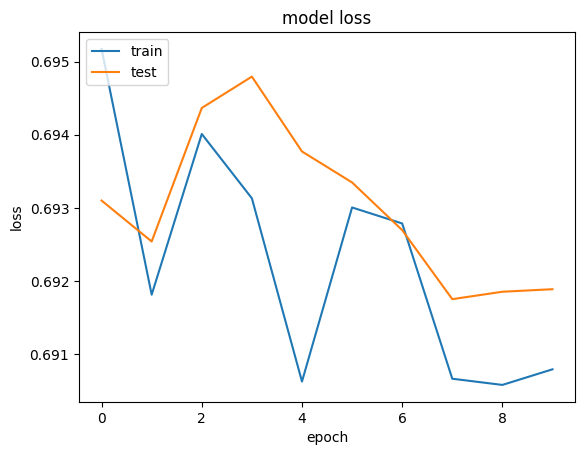

In [ ]:
#visualize the loss and accuracy over epochs
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Using Adadelta optimizer caused an over all increase in loss value, indicating it might now be the best optimizer for our problem

In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(26, 26, 1)),
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
      ])

model.compile(optimizer=tf.keras.optimizers.AdamW(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_3,model_3=train(model, X_train, Y_train, X_test, Y_test,'model1_with_max_pool_adamw')

Epoch 1/10
 1/45 [..............................] - ETA: 1:31 - loss: 0.6919 - accuracy: 0.4688

45/45 [==============================] - 3s 22ms/step - loss: 0.6971 - accuracy: 0.5116 - val_loss: 0.6916 - val_accuracy: 0.5927
Epoch 2/10
 1/45 [..............................] - ETA: 0s - loss: 0.6873 - accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 1s 15ms/step - loss: 0.6907 - accuracy: 0.5341 - val_loss: 0.6820 - val_accuracy: 0.5112
Epoch 3/10
45/45 [==============================] - 1s 15ms/step - loss: 0.6675 - accuracy: 0.6193 - val_loss: 0.5786 - val_accuracy: 0.6938
Epoch 4/10
45/45 [==============================] - 1s 12ms/step - loss: 0.5823 - accuracy: 0.7009 - val_loss: 0.6465 - val_accuracy: 0.5899
Epoch 5/10
45/45 [==============================] - 1s 17ms/step - loss: 0.4775 - accuracy: 0.7811 - val_loss: 0.5544 - val_accuracy: 0.7051
Epoch 6/10
45/45 [==============================] - 1s 14ms/step - loss: 0.4121 - accuracy: 0.8346 - val_loss: 0.3253 - val_accuracy: 0.8596
Epoch 7/10
45/45 [==============================] - 0s 8ms/step - loss: 0.2874 - accuracy: 0.8937 - val_loss: 0.3514 - val_accuracy: 0.8624
Epoch 8/10
45/45 [==============================] - 1s 12ms/step - loss: 0.2184 - accuracy: 0.9247 - val_loss: 0.3139 - val_accuracy: 0.8764
Epoch 9/10
45/45 [=======

1/1 [==============================] - 0s 17ms/step


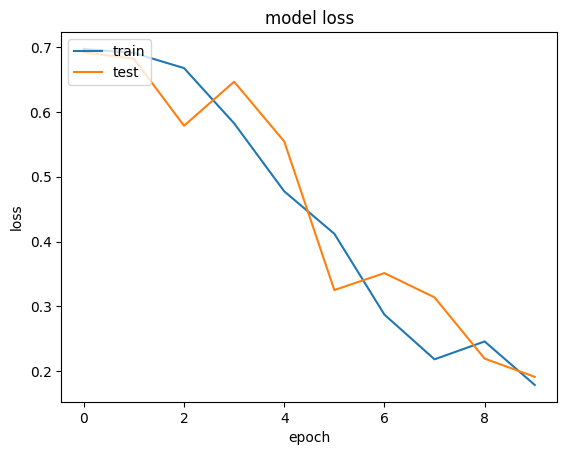

In [ ]:
#visualize the loss and accuracy over epochs
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Using AdamW optimization technque we saw considerable increase in our model's performance

Let Us Try using Seperable Conv

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(26, 26, 1)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.SeparableConv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.AdamW(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_3,model_3=train(model, X_train, Y_train, X_test, Y_test,'model2')

Epoch 1/10
 1/45 [..............................] - ETA: 4:00 - loss: 0.7436 - accuracy: 0.4688

45/45 [==============================] - 7s 27ms/step - loss: 0.6573 - accuracy: 0.6531 - val_loss: 0.6798 - val_accuracy: 0.6545
Epoch 2/10
 8/45 [====>.........................] - ETA: 0s - loss: 0.5743 - accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 1s 13ms/step - loss: 0.5197 - accuracy: 0.7445 - val_loss: 0.6633 - val_accuracy: 0.5815
Epoch 3/10
45/45 [==============================] - 1s 13ms/step - loss: 0.4730 - accuracy: 0.7818 - val_loss: 0.6575 - val_accuracy: 0.5562
Epoch 4/10
45/45 [==============================] - 0s 10ms/step - loss: 0.4150 - accuracy: 0.8100 - val_loss: 0.7551 - val_accuracy: 0.5590
Epoch 5/10
45/45 [==============================] - 0s 10ms/step - loss: 0.4049 - accuracy: 0.8065 - val_loss: 0.7782 - val_accuracy: 0.5702
Epoch 6/10
45/45 [==============================] - 0s 10ms/step - loss: 0.3885 - accuracy: 0.8283 - val_loss: 1.0473 - val_accuracy: 0.5702
Epoch 7/10
45/45 [==============================] - 1s 13ms/step - loss: 0.3757 - accuracy: 0.8227 - val_loss: 1.0288 - val_accuracy: 0.5871
Epoch 8/10
45/45 [==============================] - 1s 13ms/step - loss: 0.3216 - accuracy: 0.8466 - val_loss: 0.6936 - val_accuracy: 0.6938
Epoch 9/10
45/45 [======

1/1 [==============================] - 0s 149ms/step


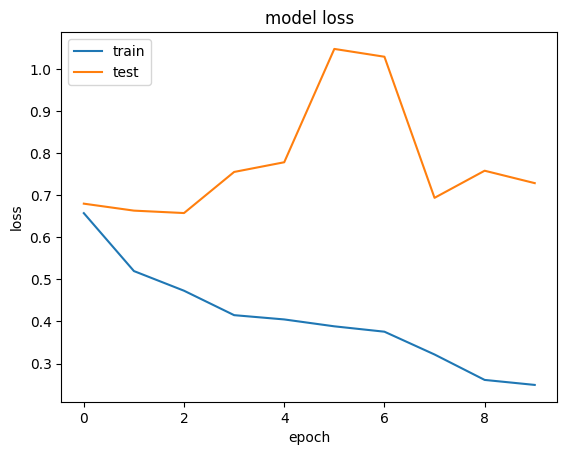

In [ ]:
#visualize the loss and accuracy over epochs
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

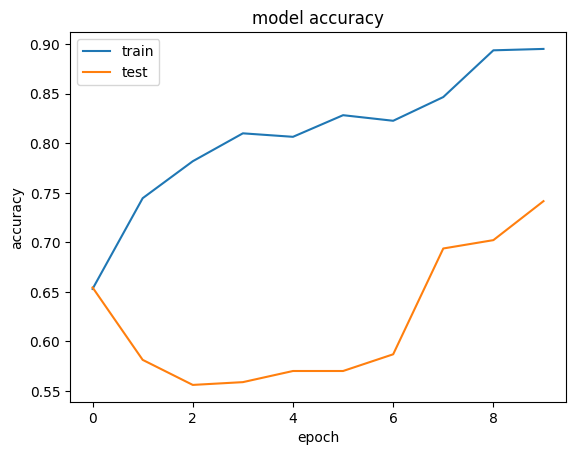

In [ ]:
#visualize the loss and accuracy over epochs
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(26, 26, 1)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.SeparableConv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.AdamW(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_4,model_4=train(model, X_train, Y_train, X_test, Y_test,'model2_2')

Epoch 1/10
 1/45 [..............................] - ETA: 4:54 - loss: 0.9601 - accuracy: 0.5312

45/45 [==============================] - 7s 18ms/step - loss: 0.6140 - accuracy: 0.6488 - val_loss: 0.6939 - val_accuracy: 0.4888
Epoch 2/10
15/45 [=========>....................] - ETA: 0s - loss: 0.5082 - accuracy: 0.7729

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 0s 9ms/step - loss: 0.4751 - accuracy: 0.7811 - val_loss: 0.7093 - val_accuracy: 0.4888
Epoch 3/10
45/45 [==============================] - 0s 9ms/step - loss: 0.4571 - accuracy: 0.7713 - val_loss: 0.7435 - val_accuracy: 0.4888
Epoch 4/10
45/45 [==============================] - 0s 9ms/step - loss: 0.3746 - accuracy: 0.8234 - val_loss: 0.8588 - val_accuracy: 0.4888
Epoch 5/10
45/45 [==============================] - 0s 9ms/step - loss: 0.3102 - accuracy: 0.8663 - val_loss: 0.9056 - val_accuracy: 0.5112
Epoch 6/10
45/45 [==============================] - 0s 10ms/step - loss: 0.2826 - accuracy: 0.8790 - val_loss: 1.1120 - val_accuracy: 0.5253
Epoch 7/10
45/45 [==============================] - 0s 9ms/step - loss: 0.2037 - accuracy: 0.9170 - val_loss: 1.2264 - val_accuracy: 0.5730
Epoch 8/10
45/45 [==============================] - 0s 10ms/step - loss: 0.1691 - accuracy: 0.9296 - val_loss: 1.2591 - val_accuracy: 0.5815
Epoch 9/10
45/45 [===========

Reducing the dropout did more harm then good.

The previous few experiments indicated that